# Kidney Disease Detection

#### Summary
* It is a classification problem
* Features include numerical values and categorical values
* Need to impute missing numerical values
* Need to impute missing categorical values
* Categorical features need to convert to numerical (get_dummies or DictVectorizer)
* DictVectorizer is introduced
* Pipeline build

#### dataset source
* The chronic kidney disease dataset contains both categorical and numeric features, but contains lots of missing values. The goal here is to predict who has chronic kidney disease given various blood indicators as features.</p>
* The dataset can be download from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

#### Package
* There are 3 self defined package: 
    * missing_values_table: check the percetage of missing values and turn it into a table
    * Categorical_Imputer: imputing categorical missing values using the most frequent
    * roc_auc: plot roc curve

## Library

In [1]:
# Pandas
import pandas as pd

# Numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# XGB
import xgboost as xgb

# cross_val_score
from sklearn.model_selection import cross_val_score

# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# Imputer
from sklearn.preprocessing import Imputer

# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# check missing value percentage *(Self Defined Package)
from missing_value.missing_values_table import missing_values_table

# fill categoriacal missing values *(Self Defined Package)
from missing_value.fill_missing_values import Categorical_Imputer

# Plot AUC *(Self Defined Package)
from metrics.roc_auc import roc_auc

# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve

# $\rm I.$ Data Preparation
In this section, we load the data, inspect missing values, convert data type, convert target to numerical

## Load Data

In [2]:
# set display columns
pd.set_option('display.max_columns', 30)

In [3]:
# load data
df = pd.read_csv('datasets/chronic_kidney_disease.csv', header=None, 
                 names=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                           'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'])

# head of df
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,25,1.1,142,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,?,normal,notpresent,notpresent,100,54,24.0,104,4.0,12.4,36,?,?,no,no,no,good,no,no,ckd
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,31,1.1,?,?,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,60,1.9,?,?,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


Columns explain:
* age		-	age	
* bp		-	blood pressure
* sg		-	specific gravity
* al		-   albumin
* su		-	sugar
* rbc		-	red blood cells
* pc		-	pus cell
* pcc		-	pus cell clumps
* ba		-	bacteria
* bgr		-	blood glucose random
* bu		-	blood urea
* sc		-	serum creatinine
* sod		-	sodium
* pot		-	potassium
* hemo	    -	hemoglobin
* pcv		-	packed cell volume
* wc		-	white blood cell count
* rc		-	red blood cell count
* htn		-	hypertension
* dm		-	diabetes mellitus
* cad		-	coronary artery disease
* appet	    -	appetite
* pe		-	pedal edema
* ane		-	anemia
* class	    -	class	

## Exporatory Data Analysis

In [4]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      400 non-null object
bp       400 non-null object
sg       400 non-null object
al       400 non-null object
su       400 non-null object
rbc      400 non-null object
pc       400 non-null object
pcc      400 non-null object
ba       400 non-null object
bgr      400 non-null object
bu       400 non-null object
sc       400 non-null object
sod      400 non-null object
pot      400 non-null object
hemo     400 non-null object
pcv      400 non-null object
wc       400 non-null object
rc       400 non-null object
htn      400 non-null object
dm       400 non-null object
cad      400 non-null object
appet    400 non-null object
pe       400 non-null object
ane      400 non-null object
class    400 non-null object
dtypes: object(25)
memory usage: 78.2+ KB


* All columns have dtype object, no matter categorial columns or numerical columns.
* We can see there are some missing values in ?, but pandas does not regard it as missing values.

#### Replace ? with Null

In [5]:
# repace ? values
df.replace('?', np.nan, inplace=True)

df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,25,1.1,142,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,NaN,normal,notpresent,notpresent,100,54,24.0,104,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,410,31,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,60,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null object
bp       388 non-null object
sg       353 non-null object
al       354 non-null object
su       351 non-null object
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null object
bu       381 non-null object
sc       383 non-null object
sod      313 non-null object
pot      312 non-null object
hemo     348 non-null object
pcv      329 non-null object
wc       294 non-null object
rc       269 non-null object
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: object(25)
memory usage: 78.2+ KB


#### Check missing value percentage

In [7]:
# missing value table
missing_values_table(df)

Your slelected dataframe has 25 columns.
There are 24 columns that have missing values.


,Missing Values,% of Total Values
rbc,152,38.00
rc,131,32.75
wc,106,26.50
pot,88,22.00
sod,87,21.75
pcv,71,17.75
pc,65,16.25
hemo,52,13.00
su,49,12.25
sg,47,11.75


#### Convert to Numeric

In [8]:
# numerical columns
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

In [9]:
# categorical columns
cate_cols = df.columns.drop('class').drop(num_cols)
# display categorical columns
cate_cols

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')

In [10]:
# convert numerical data 
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [11]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wc       294 non-null float64
rc       269 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(14), object(11)
memory usage: 78.2+ KB


#### Categorical Feature Unique Values

In [12]:
# categorical columns
cate_cols = df.columns.drop('class').drop(num_cols)
# display categorical columns
cate_cols

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')

In [13]:
# check the number of unique values
df[cate_cols].apply(lambda x: x.nunique(), axis=0)

rbc      2
pc       2
pcc      2
ba       2
htn      2
dm       3
cad      2
appet    2
pe       2
ane      2
dtype: int64

In [14]:
# Problem found on df['dm'], string has extra space
df['dm'].unique()

array(['yes', 'no', ' yes', nan], dtype=object)

In [15]:
df['dm'].dtype

dtype('O')

In [16]:
# delete the space
df['dm'] = df['dm'].str.strip()

**If not delete this extra space, an error will be caused in pipeline due to X_train and X_test dimension not match!**

#### Convert target into 0 and 1

In [17]:
# convert categorical target to numerical
df['class'] = df['class'].apply(lambda x: 1 if x=='ckd' else 0)

# show the head of df['class']
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [18]:
# X and y
X = df.drop(columns=['class'])
y= df['class']

In X, we have missing values for both numerical and categorical data.

# $\rm II.$ Sklearn Imputer and Pandas Get Dummies Approach
In this section, we use sklearn Imputer to impute missing numerical and categorical missing values. We use pandas getdummies to turn categorical values into numerical values.

In [19]:
# load X and y
X = df.drop(columns=['class'])
y= df['class']

## Imputing Data

In [20]:
# define numerical imputer
num_imputer = Imputer(strategy='median')

In [21]:
# imputing on numerical data
X[num_cols] = num_imputer.fit_transform(X[num_cols])

In [22]:
# define categorical imputer
cate_imputer = Categorical_Imputer('most_frequent')

In [23]:
# imputing on categorical data
X[cate_cols] = cate_imputer.fit_transform(X[cate_cols])

In [24]:
# X head
X.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no
6,68.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36.0,8000.0,4.8,no,no,no,good,no,no
7,24.0,80.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,138.0,4.4,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,138.0,4.4,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes


In [25]:
# missing value table
missing_values_table(X)

Your slelected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Get dummies
Turn categorical feature into numerical values

In [26]:
# Get dummies
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

# X head
X.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1,1,0,0,0,0,0,0,0,0


In [27]:
# X shape
X.shape

(400, 24)

## Cross Validation

In [28]:
# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()

In [29]:
# cross validation score
cv_scores = cross_val_score(xgb_cl, X, y, scoring='roc_auc', cv=3)

In [30]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.9987177280550775


## Fit Model

In [31]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=21, stratify=y)

In [32]:
# fit the model
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## ROC AUC Curve

In [33]:
# predict on the test set
y_pred_prob = xgb_cl.predict_proba(X_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [34]:
# instantiate a roc_auc object
ROC = roc_auc(y_test, y_pred_prob, model='XGB')

In [35]:
# AUC score
ROC.auc()

0.9976296296296296

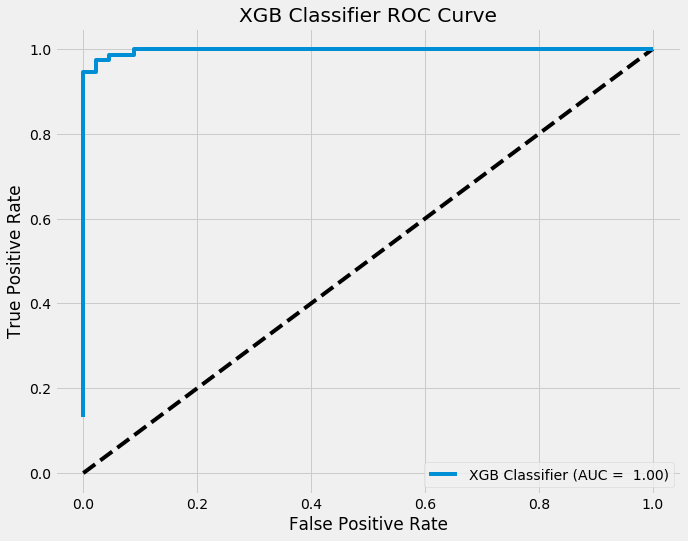

In [36]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot roc
ROC.plot_roc()

## Feature Importance

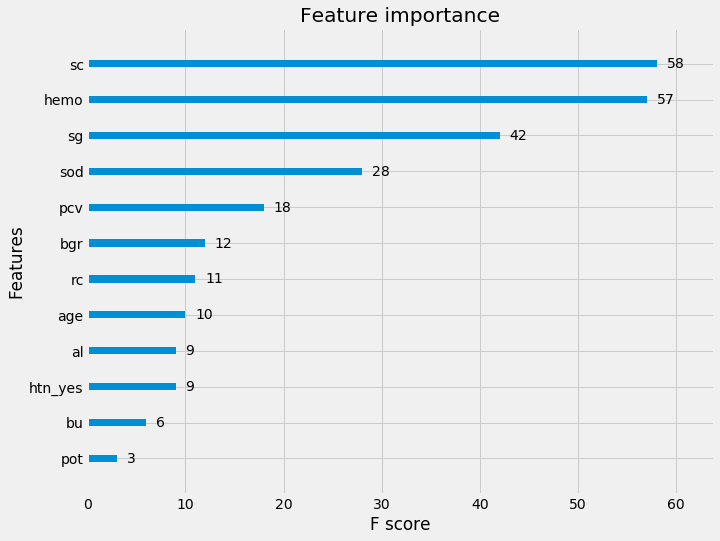

In [37]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(xgb_cl)

# $\rm III.$  Pipeline: Sklearn Imputer Approach Pandas Get Dummies 
* Pipeline advantage: The advantage of pipeline is when new raw data comes in, pipeline can directly make predictions on it. Don't need to go through the individual data processing steps. It works like a workflow. Also, the final pipeline is very concise. 
* Pipeline disadvantage: The disadvange is it is very strict  in data types at each step, when pipeline goes wrong, it is hard to debug where causes the trouble. it takes more effort to build a working pipeline.

In [38]:
# load X and y
X = df.drop(columns=['class'])
y= df['class']

## Selctor: Function Transformer
We need to imputing numerical and categorical data separately, the first step is to make selector to select them respectively

In [39]:
# Selector for numerical data
select_numeric = FunctionTransformer(lambda x: x[num_cols], validate=False)

In [40]:
# Selector for categorical data
select_cate = FunctionTransformer(lambda x: x[cate_cols], validate=False)

## Imputing: Function Transformer
Apply FeatureUnion to combine numerical imputing and categorical imputing results together

In [41]:
# define numerical imputer
num_imputer = Imputer(strategy='median')

In [42]:
# define categorical imputer
cate_imputer = Categorical_Imputer('most_frequent')

In [43]:
# FunctionTransformer applied on the cate_imputer's fit_transform function
cate_imp = FunctionTransformer(cate_imputer.fit_transform, validate=False)

## Numerical Sub-Pipeline

In [44]:
# numerical pipeline
num_pipeline = Pipeline(steps=
                        [('select_num', select_numeric),
                         ('imp_num', num_imputer)])

In [45]:
# Test num_pipeline
num_pipeline.fit_transform(X)

array([[4.800e+01, 8.000e+01, 1.020e+00, ..., 4.400e+01, 7.800e+03,
        5.200e+00],
       [7.000e+00, 5.000e+01, 1.020e+00, ..., 3.800e+01, 6.000e+03,
        4.800e+00],
       [6.200e+01, 8.000e+01, 1.010e+00, ..., 3.100e+01, 7.500e+03,
        4.800e+00],
       ...,
       [1.200e+01, 8.000e+01, 1.020e+00, ..., 4.900e+01, 6.600e+03,
        5.400e+00],
       [1.700e+01, 6.000e+01, 1.025e+00, ..., 5.100e+01, 7.200e+03,
        5.900e+00],
       [5.800e+01, 8.000e+01, 1.025e+00, ..., 5.300e+01, 6.800e+03,
        6.100e+00]])

## Categorical Sub-Pipeline

In [46]:
# categorical pipeline
cate_pipeline = Pipeline(steps=
                         [('select_cate', select_cate),
                          ('imp_cate', cate_imp)])

In [47]:
# Test categorical pipeline
cate_pipeline.fit_transform(X).head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


<p>If we get dummies after combine numerical and categorical data, FeatureUnion will output a 2D numpy array mixed of numerical and categorical data. Pandas get dummies won't work on numpy array. Even if use pd.DataFrame() turn it into a DataFrame, the mixed numerical and categorical data will cause trouble in dtypes. pd.DataFrame() usually only works on concering a numpy array only containing float to dataframe.
    
<p> We incorporate get dummies in categorical data sub pipeline.

In [48]:
# Make a transformer from a function
get_dummies = FunctionTransformer(lambda x: pd.get_dummies(x, prefix_sep='_', drop_first=True), validate=False)

In [49]:
# categorical pipeline
cate_pipeline = Pipeline(steps=
                         [('select_cate', select_cate),
                          ('imp_cate', cate_imp),
                          ('get_dummies', get_dummies)])

In [50]:
# test output
cate_pipeline.fit_transform(X).head()

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,1,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1
3,1,0,1,0,1,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0


## FeatureUnion

In [51]:
# Combine numerical and categorical processing
union_impute = FeatureUnion(transformer_list=
                           [('numerical', num_pipeline),
                            ('categorical', cate_pipeline)])

In [52]:
# Test union_impute
union_results = union_impute.fit_transform(X)

# print union_results
union_results

array([[48.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  1.   ,  0.   ,  1.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  0.   ,  0.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  0.   ,  0.   ,  0.   ]])

FeatureUnion ouputs an array, no longer a DataFrame

In [53]:
# union_results dimension
union_results.shape

(400, 24)

## Classifier

In [54]:
# XGBClassifier
xgb_cl = xgb.XGBClassifier()

## Build Pipeline

In [55]:
# Build pipeline
pipeline = Pipeline(steps=[
    ('union', union_impute),
    ('classifier', xgb_cl)
])

## Cross Validation Score on Pipeline

In [56]:
cross_val_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=3)

In [57]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.9987177280550775


## Fit Model

In [58]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=21, stratify=y)

In [59]:
# fit the model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('numerical', Pipeline(memory=None,
     steps=[('select_num', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x00000239DEF3A840>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='depr...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

## ROC AUC Curve

In [60]:
# predict on the test set
y_pred_prob = pipeline.predict_proba(X_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [61]:
# instantiate a roc_auc object
ROC = roc_auc(y_test, y_pred_prob, model='XGB')

In [62]:
# AUC score
ROC.auc()

0.9976296296296295

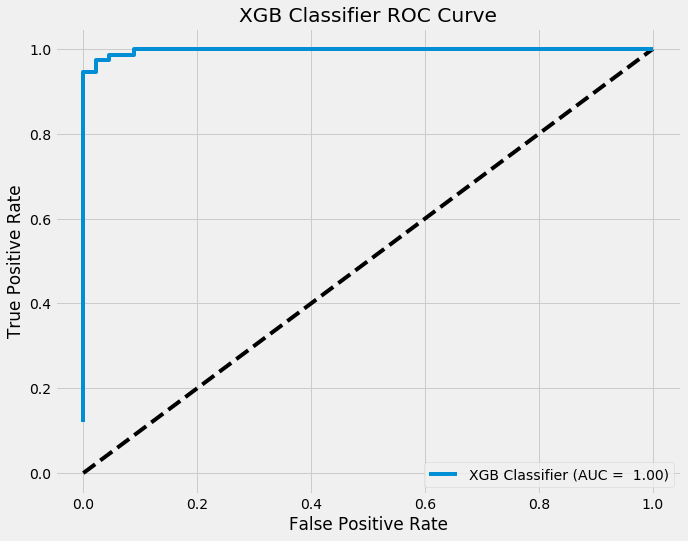

In [63]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot roc
ROC.plot_roc()

## Feature Importance

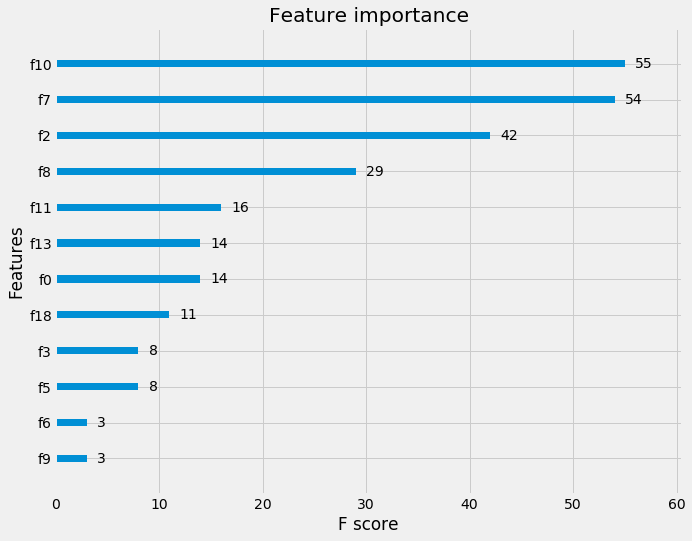

In [64]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(pipeline.named_steps['classifier'])

In order to get feature importance, we need to extract the xgb step by using <code>pipeline.named_steps['classifier']</code>

# $\rm IV.$ Sklearn_pandas package Approach

In [65]:
# load X and y
X = df.drop(columns=['class'])
y= df['class']

## Creat Boolean Mask

In [66]:
# Categorical boolean mask
categorical_feature_mask = (X.dtypes==object)

## Categorial feature list & Numerical feature list

In [67]:
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

# show categorical columns
categorical_cols

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [68]:
# filter numerical columns using mask and turn it into a list
numerical_cols = X.columns[~categorical_feature_mask].tolist()

# show numerical columns
numerical_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

## Numerical Imputer: DataFrameMapper

In [69]:
# Construc numerical imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature],Imputer(strategy="median")) for numeric_feature in numerical_cols],
                                            input_df=True,
                                            df_out=True
                                           )

In [70]:
# imputing numerical missing values
X_num = numeric_imputation_mapper.fit_transform(X)

## Categorical Imputer: DataFrameMapper

In [71]:
# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, CategoricalImputer()) for category_feature in categorical_cols],
                                                input_df=True,
                                                df_out=True
                                               )

In [72]:
# imputing categorical missing values
X_cat = categorical_imputation_mapper.fit_transform(X)

## Concatenate X_num and X_cat

In [73]:
# concat X
X =  pd.concat([X_num, X_cat], axis=1) # axis=1 means concat in the column direction

# show X head
X.head()  # X is still a dataframe

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [74]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
rbc       object
pc        object
pcc       object
ba        object
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

## *Test LabelEncoder and OneHotEncoder

## DictVectorizer
DictVectorizer do LabelEncoder and OneHotEncoder all at once. 

* DictVectorizer on X

In [116]:
# turn X into dict
X_dict = X.to_dict(orient='records') # turn each row as key-value pairs

# show X_dict
X_dict

[{'age': 48.0,
  'bp': 80.0,
  'sg': 1.02,
  'al': 1.0,
  'su': 0.0,
  'rbc': nan,
  'pc': 'normal',
  'pcc': 'notpresent',
  'ba': 'notpresent',
  'bgr': 121.0,
  'bu': 36.0,
  'sc': 1.2,
  'sod': nan,
  'pot': nan,
  'hemo': 15.4,
  'pcv': 44.0,
  'wc': 7800.0,
  'rc': 5.2,
  'htn': 'yes',
  'dm': 'yes',
  'cad': 'no',
  'appet': 'good',
  'pe': 'no',
  'ane': 'no'},
 {'age': 7.0,
  'bp': 50.0,
  'sg': 1.02,
  'al': 4.0,
  'su': 0.0,
  'rbc': nan,
  'pc': 'normal',
  'pcc': 'notpresent',
  'ba': 'notpresent',
  'bgr': nan,
  'bu': 18.0,
  'sc': 0.8,
  'sod': nan,
  'pot': nan,
  'hemo': 11.3,
  'pcv': 38.0,
  'wc': 6000.0,
  'rc': nan,
  'htn': 'no',
  'dm': 'no',
  'cad': 'no',
  'appet': 'good',
  'pe': 'no',
  'ane': 'no'},
 {'age': 62.0,
  'bp': 80.0,
  'sg': 1.01,
  'al': 2.0,
  'su': 3.0,
  'rbc': 'normal',
  'pc': 'normal',
  'pcc': 'notpresent',
  'ba': 'notpresent',
  'bgr': 423.0,
  'bu': 53.0,
  'sc': 1.8,
  'sod': nan,
  'pot': nan,
  'hemo': 9.6,
  'pcv': 31.0,
  'wc': 7

In [86]:
# instantiate a Dictvectorizer object for X
dv_X = DictVectorizer(sparse=False) # sparse = False makes the output is not a sparse matrix

In [87]:
# apply dv_X on X_dict
X_encoded = dv_X.fit_transform(X_dict)

# show X_encoded
X_encoded

array([[4.80e+01, 1.00e+00, 0.00e+00, ..., 1.38e+02, 0.00e+00, 7.80e+03],
       [7.00e+00, 4.00e+00, 0.00e+00, ..., 1.38e+02, 0.00e+00, 6.00e+03],
       [6.20e+01, 2.00e+00, 1.00e+00, ..., 1.38e+02, 3.00e+00, 7.50e+03],
       ...,
       [1.20e+01, 0.00e+00, 0.00e+00, ..., 1.37e+02, 0.00e+00, 6.60e+03],
       [1.70e+01, 0.00e+00, 0.00e+00, ..., 1.35e+02, 0.00e+00, 7.20e+03],
       [5.80e+01, 0.00e+00, 0.00e+00, ..., 1.41e+02, 0.00e+00, 6.80e+03]])

In [88]:
# vocabulary
vocab = dv_X.vocabulary_

# show vocab
vocab

{'age': 0,
 'bp': 6,
 'sg': 20,
 'al': 1,
 'su': 22,
 'bgr': 5,
 'bu': 7,
 'sc': 19,
 'sod': 21,
 'pot': 16,
 'hemo': 10,
 'pcv': 14,
 'wc': 23,
 'rc': 18,
 'rbc': 17,
 'pc': 12,
 'pcc': 13,
 'ba': 4,
 'htn': 11,
 'dm': 9,
 'cad': 8,
 'appet': 3,
 'pe': 15,
 'ane': 2}

In [89]:
# sort vocabulary
sorted_vocab = sorted(vocab.items(), key=lambda x: x[1])

# show sorted_vocab
sorted_vocab

[('age', 0),
 ('al', 1),
 ('ane', 2),
 ('appet', 3),
 ('ba', 4),
 ('bgr', 5),
 ('bp', 6),
 ('bu', 7),
 ('cad', 8),
 ('dm', 9),
 ('hemo', 10),
 ('htn', 11),
 ('pc', 12),
 ('pcc', 13),
 ('pcv', 14),
 ('pe', 15),
 ('pot', 16),
 ('rbc', 17),
 ('rc', 18),
 ('sc', 19),
 ('sg', 20),
 ('sod', 21),
 ('su', 22),
 ('wc', 23)]

## Cross Validation

In [90]:
# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()

In [91]:
# cross validation score
cv_scores = cross_val_score(xgb_cl, X_encoded, y, scoring='roc_auc', cv=3)

In [92]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.9987177280550775


## Fit Model

In [93]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, 
                                                    random_state=21, stratify=y)

In [94]:
# fit the model
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## ROC AUC Curve

In [95]:
# predict on the test set
y_pred_prob = xgb_cl.predict_proba(X_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [96]:
# instantiate a roc_auc object
ROC = roc_auc(y_test, y_pred_prob, model='XGB')

In [97]:
# AUC score
ROC.auc()

0.9976296296296296

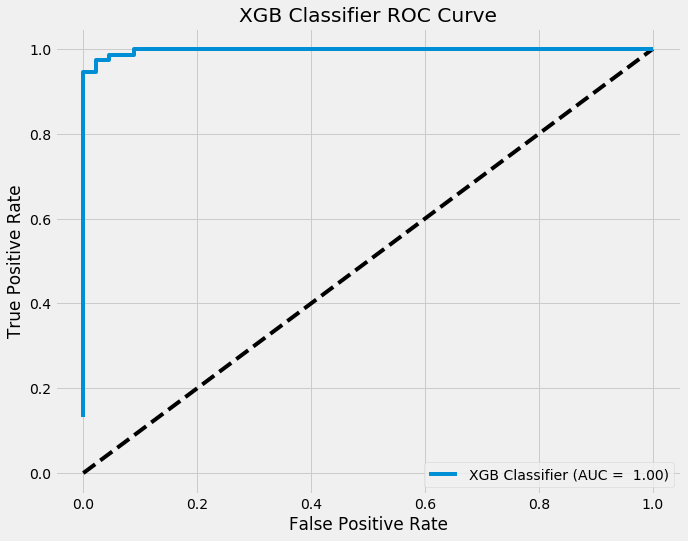

In [98]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot roc
ROC.plot_roc()

## Feature Importance

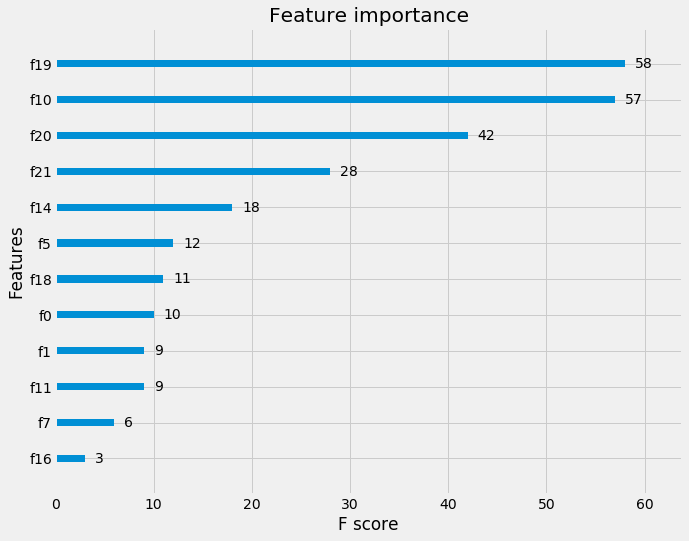

In [99]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(xgb_cl)

# $\rm IV.$ Pipeline: Sklearn_pandas Approach

In [100]:
# load X and y
X = df.drop(columns=['class'])
y= df['class']

In [101]:
# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature],Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [102]:
# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

In [103]:
# make a transformer: Dictifier
def dictifier(arr:'Array'):
    """This function is used to turn an array to a dictionary"""
    # turn array to dataframe
    dataframe = pd.DataFrame(arr)
    # turn dataframe to a dictionary
    df_dict = dataframe.to_dict('records')
    # return results
    return df_dict

# make a transformer
Dictifier = FunctionTransformer(dictifier, validate=False)

In [104]:
# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ('dictifier', Dictifier),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X, y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

3-fold AUC:  0.998637406769937


## Fit Model

In [105]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=21, stratify=y)

In [106]:
# fit the model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('num_mapper', DataFrameMapper(default=False, df_out=True,
        features=[(['age'], Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), (['bp'], Imputer(axis=0, copy=True, missing_values='NaN', st...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

## ROC AUC Curve

In [107]:
# predict on the test set
y_pred_prob = pipeline.predict_proba(X_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [108]:
# instantiate a roc_auc object
ROC = roc_auc(y_test, y_pred_prob, model='XGB')

In [109]:
# AUC score
ROC.auc()

0.9976296296296295

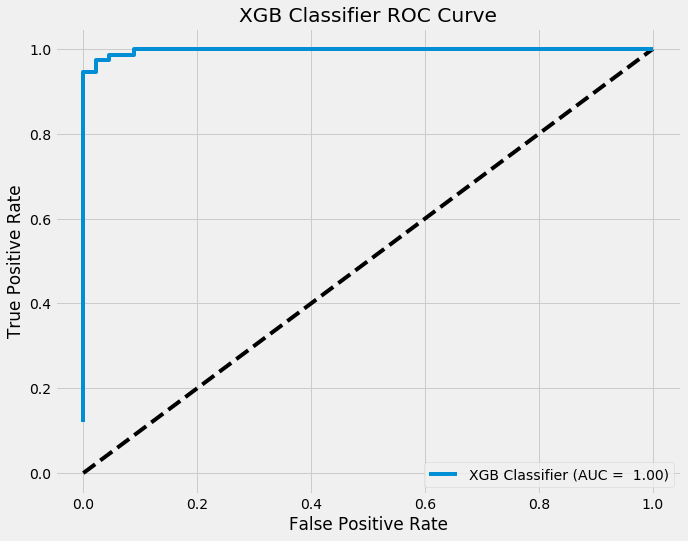

In [110]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot roc
ROC.plot_roc()

## Feature Importance

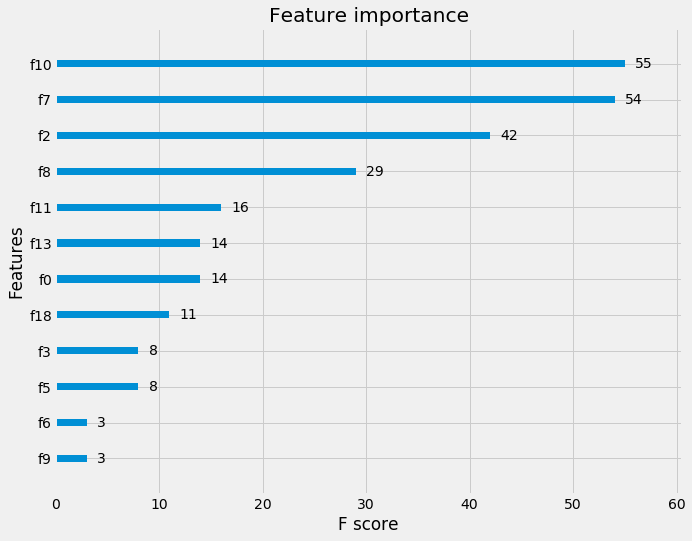

In [111]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(pipeline.named_steps['clf'])